# Scattering of water droplet

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [34]:
import PyMieScatt as ps
ps.MieQ(1.5+0.5j,532,200,asDict=True)

{'Qext': 1.693237598485073,
 'Qsca': 0.4725443528128364,
 'Qabs': 1.2206932456722366,
 'g': 0.3153569918620273,
 'Qpr': 1.5442174328606284,
 'Qback': 0.25575930719896567,
 'Qratio': 0.5412387338385268}

In [35]:
dp = np.linspace(10,1000,1000)
N,sh,sc = 1e5,5,200
w=[N*((sh/sc)*(d/sc)**(sh-1))*np.exp(-(d/sc)**sh) for d in dp]
ps.Mie_SD(1.5+0.5j,405,dp,w,asDict=True)

{'Bext': 5799.696165211469,
 'Bsca': 2003.4477689477499,
 'Babs': 3796.248396263719,
 'G': 0.5466232557873613,
 'Bpr': 4704.565022949325,
 'Bback': 289.2629626361788,
 'Bratio': 555.8795550355866}

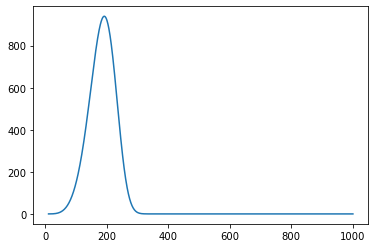

In [38]:
plt.plot(dp, w)

In [41]:
dir(ps)

['AutoMieQ',
 'AutoMie_ab',
 'ContourIntersection',
 'ContourIntersection_SD',
 'CoreShell',
 'CoreShellMatrixElements',
 'CoreShellS1S2',
 'CoreShellScatteringFunction',
 'Inverse',
 'Inversion',
 'Inversion_SD',
 'LowFrequencyMieQ',
 'LowFrequencyMie_ab',
 'MatrixElements',
 'Mie',
 'MiePiTau',
 'MieQ',
 'MieQCoreShell',
 'MieQ_withDiameterRange',
 'MieQ_withSizeParameterRange',
 'MieQ_withWavelengthRange',
 'MieS1S2',
 'Mie_Lognormal',
 'Mie_SD',
 'Mie_ab',
 'Mie_cd',
 'RayleighMieQ',
 'SF_SD',
 'ScatteringFunction',
 'SurveyIteration',
 'SurveyIteration_SD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'fastMieQ',
 'fastMie_SD']

## load water 

In [2]:
url = "https://refractiveindex.info/data_csv.php?datafile=data/main/H2O/Hale.yml"
df1 = pd.read_csv(url)

#reorganize data
#original data with n and k in the same columne
index1=df1.index[df1.n=='k'].tolist()[0]
df2=df1[:index1].astype(float)
df2['k']=df1[index1+1:].n.values.astype('float')
df1=df2

#if data are downloaded and stored in local file
#df1=pd.read_csv('./Rakic-BB.csv')
#df1=df1.drop(columns=['wl.1'])
#df1.columns=["Wavelength", "n", "k"]

#change column name and use only wavelength less than 800nm
df1.columns=["Wavelength", "n", "k"]
df1.Wavelength=df1.Wavelength*1000
df1H2o=df1[(df1['Wavelength']<910) & (df1['Wavelength']>290)]
df1H2o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 4 to 28
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Wavelength  25 non-null     float64
 1   n           25 non-null     float64
 2   k           25 non-null     float64
dtypes: float64(3)
memory usage: 800.0 bytes


In [3]:
df1H2o

,Wavelength,n,k
4,300.0,1.349,1.600000e-08
5,325.0,1.346,1.080000e-08
6,350.0,1.343,6.500000e-09
7,375.0,1.341,3.500000e-09
8,400.0,1.339,1.860000e-09
9,425.0,1.338,1.300000e-09
10,450.0,1.337,1.020000e-09
11,475.0,1.336,9.350000e-10
12,500.0,1.335,1.000000e-09
13,525.0,1.334,1.320000e-09


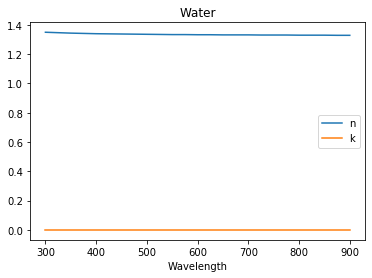

In [4]:
df1H2o.plot(x='Wavelength', y=['n','k'],logy=False,title='Water')

We can neglect the water absorption

In [5]:
#find the water absorption at 800nm
df1H2o.iloc[20] #1.329

Wavelength    8.000000e+02
n             1.329000e+00
k             1.250000e-07
Name: 24, dtype: float64

In [6]:
wv=0.8 #um
nw=1.329,
kw=1.250000e-07

nv=np.array([nw])
kv=np.array([kw])
wv=np.array([wv])

## Compute scattering results

In [7]:
import PyMieScatt as ps
def run_mie(nv, kv, wv, dv):
    nd=len(dv)
    nwv=len(wv)
    
    #run the mie code for above parameters
    miev=np.array([[ps.MieQ(nv[i]+kv[i]*1.0j,wv[i],dv[j],asDict=True) \
                    for j in range(nd)] \
                   for i in range(nwv)])

    qextv=np.array([[miev[i,j]['Qext'] for j in range(nd)]for i in range(nwv)])
    qscav=np.array([[miev[i,j]['Qsca'] for j in range(nd)]for i in range(nwv)])
    qabsv=np.array([[miev[i,j]['Qabs'] for j in range(nd)]for i in range(nwv)])
    qbackv=np.array([[miev[i,j]['Qback'] for j in range(nd)]for i in range(nwv)])
    gv=np.array([[miev[i,j]['g'] for j in range(nd)]for i in range(nwv)])

    return [qextv,qscav,qscav/qextv,qabsv, qbackv,gv]

    
def plot_q(fig, datav, ylabelv, wv, dv,labelv='',linetype='-',yscale='linear'):


    nd=len(dv)
    nwv=len(wv)
    num_plots=len(dv)

    colormap = plt.cm.gist_ncar

    for i in range(6):
        ax=plt.subplot(2,3,i+1)
        plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

        ax.set_yscale(yscale)
        for j in range(nd):
            tmp=plt.plot(wv,datav[i][:,j], linetype, label=labelv)

        plt.xlabel("Wavelength(nm)")
        plt.ylabel(ylabelv[i])
        if(i==5):
            plt.legend(bbox_to_anchor=(1.3,1.2),title="Medium")
    plt.tight_layout()

In [8]:
dv=range(10,100,5)

ylabelv=["$Q_{ext}$","$Q_{sca}$","$SSA$","$Q_{abs}$","$Q_{back}$","Asymmetry factor"]

datav1=run_mie(nv, kv, wv, dv)

In [9]:
datav1[0]

array([[2.02138593, 2.03543067, 1.98423392, 2.02331555, 2.00464664,
        2.05949231, 2.06666689, 2.0714017 , 2.0767594 , 2.07236406,
        2.08684474, 2.0777699 , 2.07733929, 2.07007297, 2.05720645,
        2.04725431, 2.03680529, 2.03147584]])

Text(0.5, 1.0, 'Wavelength:0.80 um')

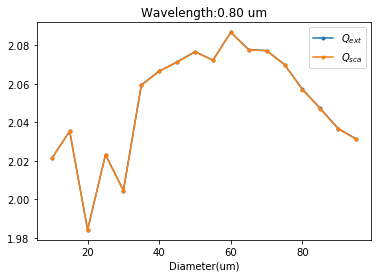

In [10]:
for i in [0,1]:
    plt.plot(dv,datav1[i][0],'.-', label=ylabelv[i])
plt.legend()
plt.xlabel("Diameter(um)")
plt.title("Wavelength:%2.2f um"%wv[0])

## Phase function

MatrixElements compute phase matrix 
- S11, S12, S33, S34 as as function of cosine scattering angle
- check normalization of the phase matrix
- check asymmetry factor 

S11 is defined in  <a href="https://pymiescatt.readthedocs.io/en/latest/forward.html#functions-for-single-particles"> PyMieScatt document </a> as ![title](https://pymiescatt.readthedocs.io/en/latest/_images/math/0f4940ef35bccebe55f5c36989412735f5ad3e07.png)
Not sure how it is normalized yet. We will compuate a normalization factor by the integration of the phase function as this:
$\frac{1}{4\pi}\int_{4\pi} f(\mu) d \Omega =\frac{1}{2} \int_{-1}^1 f(\mu) d \mu = \frac{1}{2} \sum_i (f(\mu_i)+f(\mu_{i+1})/2 \times (\mu_i-\mu_{i+1})$

### compute scattering coefficient and scattering matrix

In [31]:
d1=40 #um
d1=0.1
d1=0.17
#d1=0.3
d1=1
angv=np.linspace(0,180,181)
mu=np.cos(angv*np.pi/180.0)

#Relative refractive index in water
qv1=np.array([ps.MieQ((nv[i]+kv[i]*1.0j),wv[i],d1,asDict=True) for i in range(len(wv))])
print(qv1.shape)
qscav=np.array([qv1[i]['Qsca'] for i in range(len(wv))])

(1,)


In [32]:
wv=np.array([0.55])

(1, 181, 4)


Text(0, 0.5, 'S11')

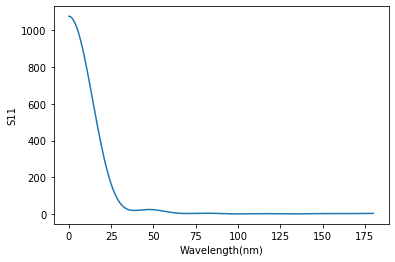

In [33]:


mv1=np.array([[ps.MatrixElements((nv[i]+kv[i]*1.0j),wv[i],d1,mu[j]) for j in range(len(mu))]for i in range(len(wv))])
print(mv1.shape)


#plot m11
ax=plt.subplot(111)
#ax.set_yscale('log')
plt.plot(angv,mv1[::10,:,0].T)
plt.xlabel("Wavelength(nm)")
plt.ylabel("S11")
#not sure how to normalize